This is the tutorial for protein property function. The dataset that we use is called beta lactamase.

First we import all necessary packages.

In [ ]:
!pip install git+https://github.com/bp-kelley/descriptastorus
!pip install lmdb seaborn wandb pydantic DeepPurpose
!pip install transformers bitsandbytes
!pip install accelerate>=0.26.0
!pip install SentencePiece einops rdchiral peft
!pip install numpy==1.23.5 pandas==1.5.3 scikit-learn==1.2.2
!pip install datasets

  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-oj_ur5n9
  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-oj_ur5n9
  Resolved https://github.com/bp-kelley/descriptastorus to commit 9a190343bcd3cfd35142d378d952613bcac40797
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 62.7 MB/s eta 0:00:00
  Created wheel for descriptastorus: filename=descriptastorus-2.7.0.3-py3-none-any.whl size=1082894 sha256=ac797819c82421e92fbafde2b465850de426daaeb00e97e683a8d61825cd609d
  Stored in directory: /tmp/pip-ephem-wheel-cache-j26h1_11/wheels/a5/37/b0/bc8b04ad2a1d1f3e17a7bff134d2a7e63621914e0a01d983a6
Successfully built descriptastorus
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.0 MB/s eta 0:00:00


In [ ]:
!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu118
!pip install  dgl -f https://data.dgl.ai/wheels/torch-2.3/cu118/repo.html
!pip install PyTDC

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.7/839.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 109.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 110.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!git clone https://github.com/jiaqingxie/DeepProtein.git

Cloning into 'DeepProtein'...
remote: Enumerating objects: 4390, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4390 (delta 2), reused 6 (delta 2), pack-reused 4384 (from 2)
Receiving objects: 100% (4390/4390), 189.80 MiB | 33.77 MiB/s, done.
Resolving deltas: 100% (2523/2523), done.
Updating files: 100% (411/411), done.


In [ ]:
import os
import sys
import argparse
import torch
import wandb
sys.path.append("/content/DeepProtein")
from DeepProtein.load_dataset import *
import DeepProtein.ProteinPred as models

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


Next we fix some hyperparamaters. Here we make wandb local.

In [ ]:
wandb.init(mode='offline', name = "PPI_Affinity")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


# 1. Single Protein Regression (Beta + CNN)

In [ ]:
target_encoding = "CNN" # test only
path = "/content/DeepProtein"
train, val, test = load_single_dataset("Beta", path, target_encoding)

Protein Function Prediction Mode...
in total: 4158 proteins
encoding protein...
unique target sequence: 4158
Done.
Protein Function Prediction Mode...
in total: 520 proteins
encoding protein...
unique target sequence: 520
Done.
Protein Function Prediction Mode...
in total: 520 proteins
encoding protein...
unique target sequence: 520
Done.


Load configuration

In [ ]:
lr = 0.0001
epochs = 20
batch_size = 32
seed = 7


In [ ]:

config = generate_config(target_encoding=target_encoding,
                            cls_hidden_dims=[1024, 1024],
                            train_epoch=epochs,
                            LR=lr,
                            batch_size=batch_size ,
                            )
config['multi'] = False

Set seed

In [ ]:
torch.manual_seed(seed)


Load model and train (epoch = 20 here for demo test, and you could add more epochs to reach better performance)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.60325. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.14836. Total time 0.00027 hours
Validation at Epoch 1 , MAE: 0.28039 , MSE: 0.10288 , Spearman Correlation: 0.03943 with p-value: 3.69E-01 , Concordance Index: 0.51338
Training at Epoch 2 iteration 0 with loss 0.11994. Total time 0.00055 hours
Training at Epoch 2 iteration 100 with loss 0.11785. Total time 0.00111 hours
Validation at Epoch 2 , MAE: 0.25531 , MSE: 0.09920 , Spearman Correlation: 0.07147 with p-value: 1.04E-01 , Concordance Index: 0.52361
Training at Epoch 3 iteration 0 with loss 0.09509. Total time 0.00138 hours
Training at Epoch 3 iteration 100 with loss 0.15386. Total time 0.00166 hours
Validation at Epoch 3 , MAE: 0.25639 , MSE: 0.09914 , Spearman Correlation: 0.19788 with p-value: 5.45E-06 , Concordance Index: 0.56620
Training at Epoch 4 iteration 0 with loss 0.12765. Total time 0.0019

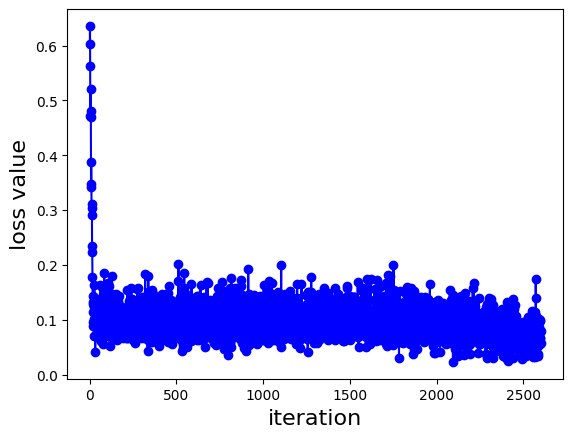

In [ ]:
import DeepProtein.ProteinPred as models
model = models.model_initialize(**config)
model.train(train, val, test, compute_pos_enc = False)

# 2. Single Protein Classification (SubCellular + ProtT5)

Data loading would take some time for A100 (~22 mins)

In [ ]:
path = "/content/DeepProtein"
target_encoding = "prot_t5"
train, val, test = load_single_dataset("SubCellular", path, target_encoding)


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/11.3G [00:00<?, ?B/s]

100%|██████████| 2773/2773 [04:42<00:00,  9.81it/s]


Protein Function Prediction Mode...
in total: 8420 proteins
encoding protein...
unique target sequence: 8420
Done.
Protein Function Prediction Mode...
in total: 2811 proteins
encoding protein...
unique target sequence: 2811
Done.
Protein Function Prediction Mode...
in total: 2773 proteins
encoding protein...
unique target sequence: 2773
Done.


Add Configuration

In [ ]:
epochs = 100
lr = 0.0001
batch_size = 32
seed = 42
config = generate_config(target_encoding=target_encoding,
                             cls_hidden_dims=[1024, 1024],
                             train_epoch=epochs,
                             LR=lr,
                             batch_size=batch_size,
                             )

config['binary'] = False
config['multi'] = True
config['classes'] = 10

torch.manual_seed(seed)

Please disregard AUPRC = 0 here since its not a binary classification.

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 2.30008. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 1.82467. Total time 0.0 hours
Training at Epoch 1 iteration 200 with loss 1.19225. Total time 0.0 hours
Validation at Epoch 1 , Accuracy: 0.66026 , AUPRC: 0 , F1: 0.40103
Training at Epoch 2 iteration 0 with loss 1.20996. Total time 0.00027 hours
Training at Epoch 2 iteration 100 with loss 1.01489. Total time 0.00055 hours
Training at Epoch 2 iteration 200 with loss 0.62408. Total time 0.00055 hours
Validation at Epoch 2 , Accuracy: 0.73283 , AUPRC: 0 , F1: 0.49770
Training at Epoch 3 iteration 0 with loss 0.84490. Total time 0.00083 hours
Training at Epoch 3 iteration 100 with loss 0.45512. Total time 0.00083 hours
Training at Epoch 3 iteration 200 with loss 0.63893. Total time 0.00111 hours
Validation at Epoch 3 , Accuracy: 0.76520 , AUPRC: 0 , F1: 0.54017
Training at Epoch 4 iteration 0 with loss 0.67505

<Figure size 640x480 with 0 Axes>

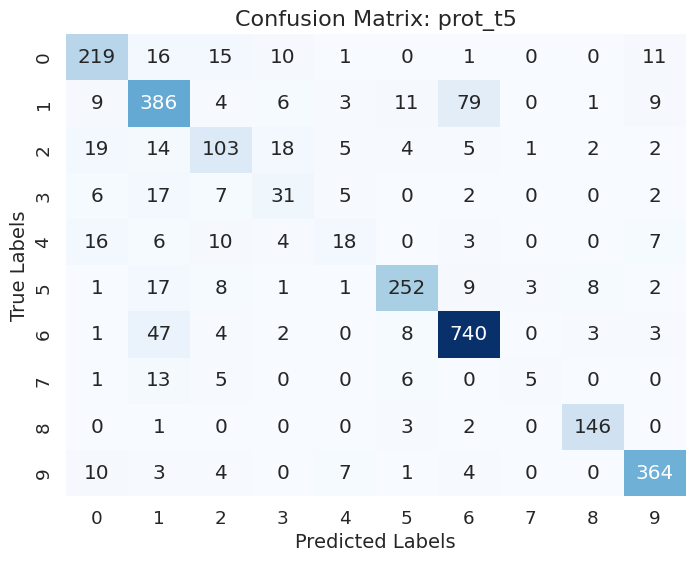

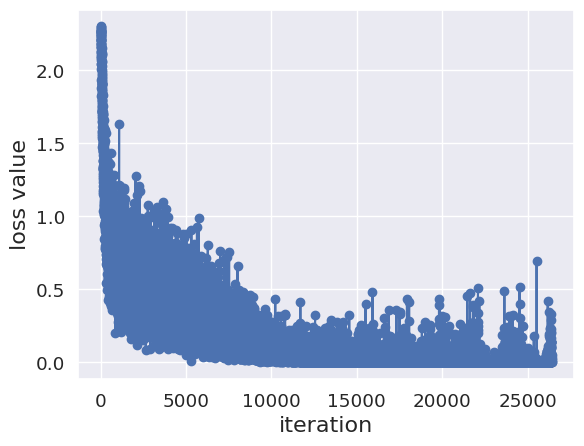

In [ ]:
import DeepProtein.ProteinPred as models
model = models.model_initialize(**config)
model.train(train, val, test, compute_pos_enc = False)

# 3. Protein Pair Regression (PPI Affinity + Transformer)

In [ ]:
path = "/content/DeepProtein"
target_encoding = "Transformer"

In [ ]:
epochs = 20
lr = 0.0001
batch_size = 32
seed = 42

In [ ]:

train, val, test = load_pair_dataset("PPI_Affinity", path, target_encoding)
config = generate_config(target_encoding = target_encoding,
                          cls_hidden_dims = [512],
                          train_epoch = epochs,
                          LR = lr,
                          batch_size = batch_size,
                        )
config['multi'] = False
torch.manual_seed(seed)

Protein Protein Interaction Prediction Mode...
in total: 2421 protein-protein pairs
encoding protein...
unique target sequence: 546
encoding protein...
unique target sequence: 1581
Done.
Protein Protein Interaction Prediction Mode...
in total: 203 protein-protein pairs
encoding protein...
unique target sequence: 74
encoding protein...
unique target sequence: 138
Done.
Protein Protein Interaction Prediction Mode...
in total: 326 protein-protein pairs
encoding protein...
unique target sequence: 60
encoding protein...
unique target sequence: 283
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 142.264. Total time 0.0 hours
Validation at Epoch 1 , MAE: 3.16775 , MSE: 15.0144 , Pearson Correlation: -0.0137 with p-value: 8.45E-01 , Concordance Index: 0.49451
Training at Epoch 2 iteration 0 with loss 26.5658. Total time 0.00083 hours
Validation at Epoch 2 , MAE: 2.48296 , MSE: 9.56186 , Pearson Correlation: 0.12021 with p-value: 8.75E-02 , Concordance Index: 0.50875
Training at Epoch 3 iteration 0 with loss 8.77219. Total time 0.00166 hours
Validation at Epoch 3 , MAE: 2.34339 , MSE: 8.70027 , Pearson Correlation: 0.29756 with p-value: 1.62E-05 , Concordance Index: 0.62346
Training at Epoch 4 iteration 0 with loss 12.2798. Total time 0.0025 hours
Validation at Epoch 4 , MAE: 2.37938 , MSE: 8.95978 , Pearson Correlation: 0.36817 with p-value: 6.50E-08 , Concordance Index: 0.63415
Training at Epoch 5 iteration 0 with loss 10.5246. Total time 0.00333 hours
Validation at Epoch

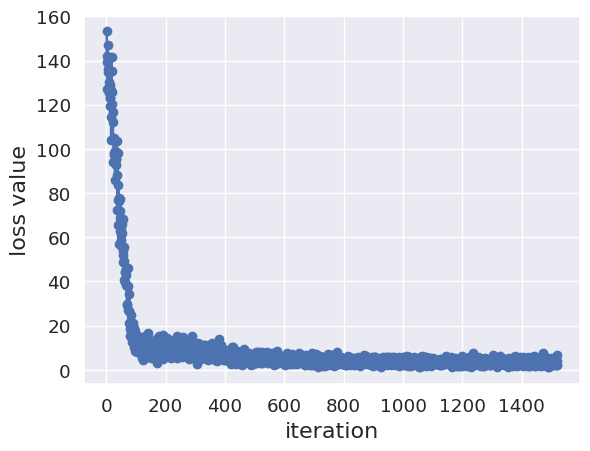

In [ ]:
import DeepProtein.PPI as models
model = models.model_initialize(**config)
model.train(train, val, test)

In [ ]:
import gc
import torch
def clear_memory():
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.ipc_collect()
clear_memory()


# 4. Protein Pair Classification (Human PPI + ProtT5)

In [ ]:
path = "/content/DeepProtein"
target_encoding = "prot_t5"

In [ ]:
epochs = 100
lr = 0.0001
batch_size = 32
seed = 42

In [ ]:
train, val, test = load_pair_dataset("Yeast_PPI", path, target_encoding)

100%|██████████| 394/394 [00:45<00:00,  8.75it/s]


Protein Protein Interaction Prediction Mode...
in total: 4945 protein-protein pairs
encoding protein...
unique target sequence: 4945
encoding protein...
unique target sequence: 4945
Done.
Protein Protein Interaction Prediction Mode...
in total: 95 protein-protein pairs
encoding protein...
unique target sequence: 95
encoding protein...
unique target sequence: 95
Done.
Protein Protein Interaction Prediction Mode...
in total: 394 protein-protein pairs
encoding protein...
unique target sequence: 394
encoding protein...
unique target sequence: 394
Done.


In [ ]:
config = generate_config(target_encoding = target_encoding,
                             cls_hidden_dims = [512],
                             train_epoch = epochs,
                             LR = lr,
                             batch_size = batch_size,
                            )
config['multi'] = False
config['binary'] = True
torch.manual_seed(seed)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69335. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 0.69517. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.45741 , AUPRC: 0.55227 , F1: 0.31168 , Cross-entropy Loss: 20.1085
Training at Epoch 2 iteration 0 with loss 0.68986. Total time 0.00027 hours
Training at Epoch 2 iteration 100 with loss 0.62833. Total time 0.00027 hours
Validation at Epoch 2 , AUROC: 0.50595 , AUPRC: 0.60342 , F1: 0.67213 , Cross-entropy Loss: 15.1762
Training at Epoch 3 iteration 0 with loss 0.62417. Total time 0.00055 hours
Training at Epoch 3 iteration 100 with loss 0.63981. Total time 0.00055 hours
Validation at Epoch 3 , AUROC: 0.54075 , AUPRC: 0.64841 , F1: 0.59047 , Cross-entropy Loss: 16.3144
Training at Epoch 4 iteration 0 with loss 0.62470. Total time 0.00083 hours
Training at Epoch 4 iteration 100 with loss 0.55570. Total time 0.00083 hours
Validation at Epoch 4 , AU

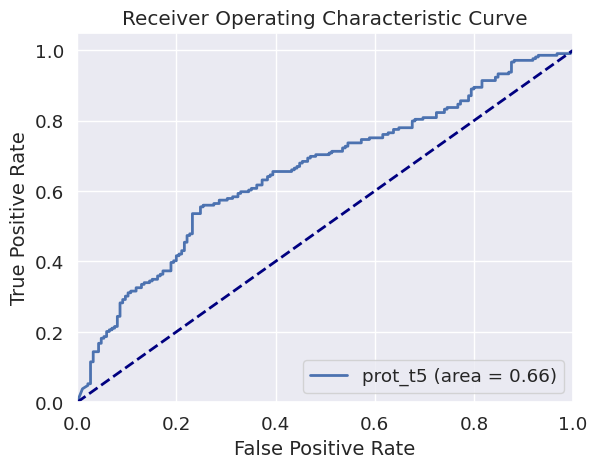

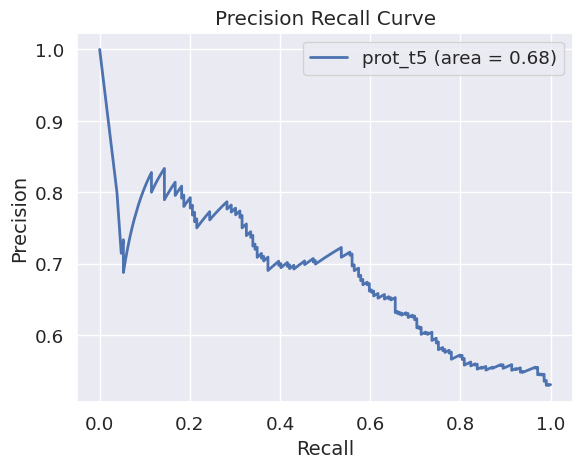

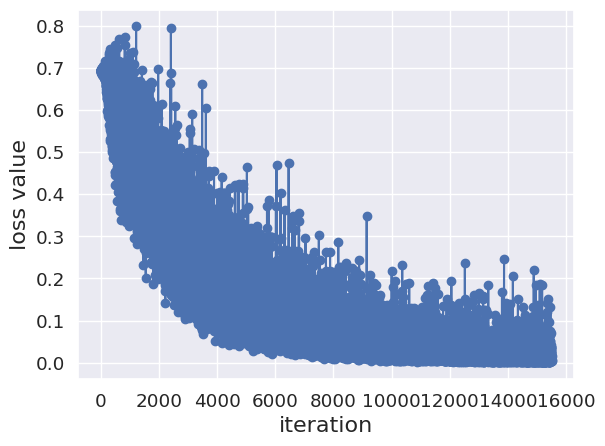

In [ ]:
import DeepProtein.PPI as models
model = models.model_initialize(**config)
model.train(train, val, test)

In [ ]:
import gc
import torch
def clear_memory():
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.ipc_collect()
clear_memory()


# 5. Residue Level Classification (PDB + Token_CNN)

In [ ]:
path = "/content/DeepProtein"
target_encoding = "Token_CNN"

In [ ]:
epochs = 300
lr = 0.001
batch_size = 32
seed = 42

In [ ]:
train, val, test = load_residue_dataset("PDB", path, target_encoding)

config = generate_config(target_encoding=target_encoding,
                          cls_hidden_dims=[1024, 1024],
                          train_epoch=epochs,
                          LR=lr,
                          batch_size=batch_size ,
                          )
config['multi'] = False
config['binary'] = True
config['token'] = True
config['in_channels'] = 20
torch.manual_seed(seed)

Found local copy...
Loading...
Done!


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.43162. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.49983 , AUPRC: 0.09787 , F1: 0.09868
Training at Epoch 2 iteration 0 with loss 0.20893. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.51089 , AUPRC: 0.10020 , F1: 0.11842
Training at Epoch 3 iteration 0 with loss 0.20795. Total time 0.0 hours
Validation at Epoch 3 , AUROC: 0.51089 , AUPRC: 0.10020 , F1: 0.11842
Training at Epoch 4 iteration 0 with loss 0.20604. Total time 0.0 hours
Validation at Epoch 4 , AUROC: 0.51642 , AUPRC: 0.10166 , F1: 0.12828
Training at Epoch 5 iteration 0 with loss 0.20640. Total time 0.0 hours
Validation at Epoch 5 , AUROC: 0.52681 , AUPRC: 0.10492 , F1: 0.14684
Training at Epoch 6 iteration 0 with loss 0.20358. Total time 0.0 hours
Validation at Epoch 6 , AUROC: 0.52871 , AUPRC: 0.10560 , F1: 0.15021
Training at Epoch 7 iteration 0 with loss 0.20252. Total time 0.0 hours
Validation

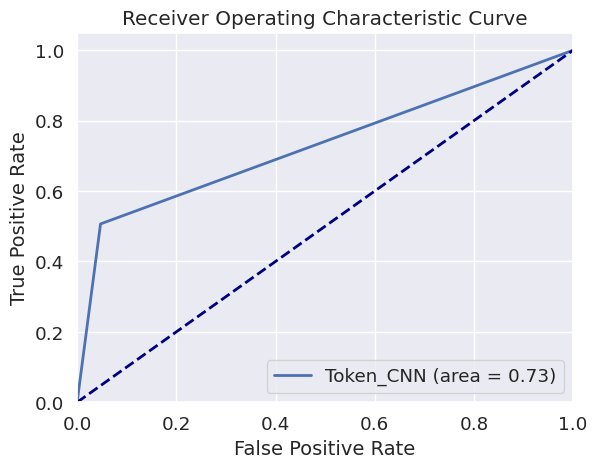

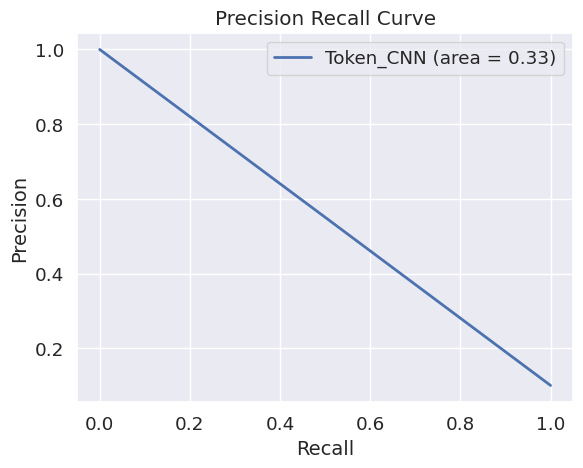

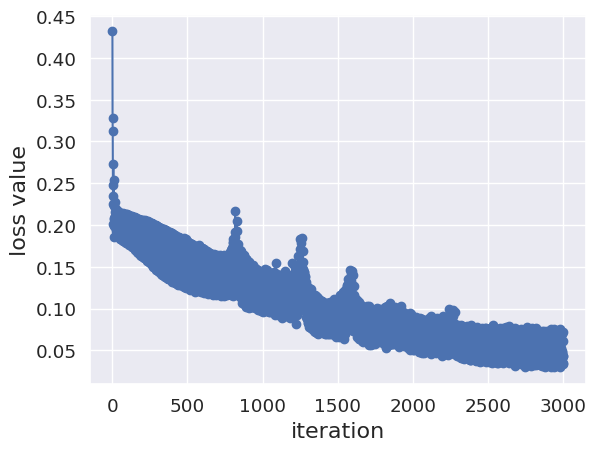

In [ ]:
import DeepProtein.TokenPred as models
model = models.model_initialize(**config)
model.train(train, val, test, batch_size=batch_size)